In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Load the dataset

df = pd.read_csv("customer_data.csv")
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [3]:
# Drop 'id' column since it's not useful for clustering
df.drop(columns=["id"], inplace=True)

In [4]:
# Identify categorical and numerical columns
categorical_cols = ["gender", "education", "region", "loyalty_status", "purchase_frequency", "product_category"]
numerical_cols = ["age", "income", "purchase_amount", "promotion_usage", "satisfaction_score"]

In [5]:
# Handle missing values (if any)
df.dropna(inplace=True)

In [6]:
# One-Hot Encoding for categorical data & Scaling for numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

In [7]:
# Transform the data
processed_data = preprocessor.fit_transform(df)

In [8]:

# Convert processed data into a DataFrame
feature_names = numerical_cols + preprocessor.named_transformers_["cat"].get_feature_names_out().tolist()
df_processed = pd.DataFrame(processed_data, columns=feature_names)

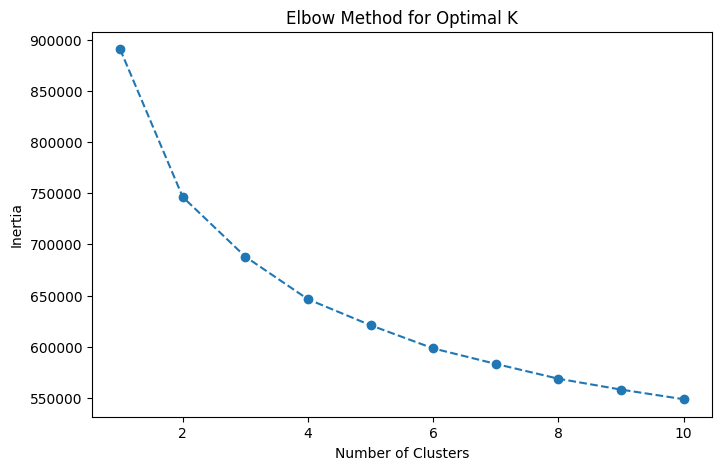

In [9]:
# Finding optimal clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [10]:
# Applying K-Means Clustering (Assuming K=4 based on the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_processed)

In [11]:

# PCA for Visualization (Reducing to 2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

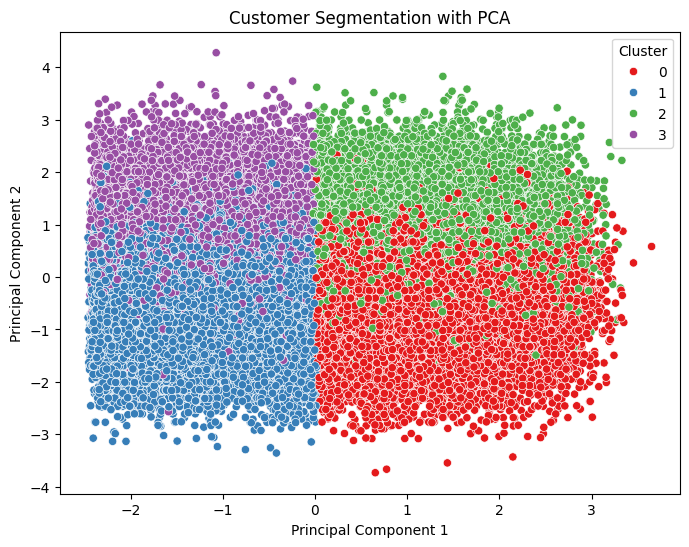

In [12]:
# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="Set1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation with PCA")
plt.show()


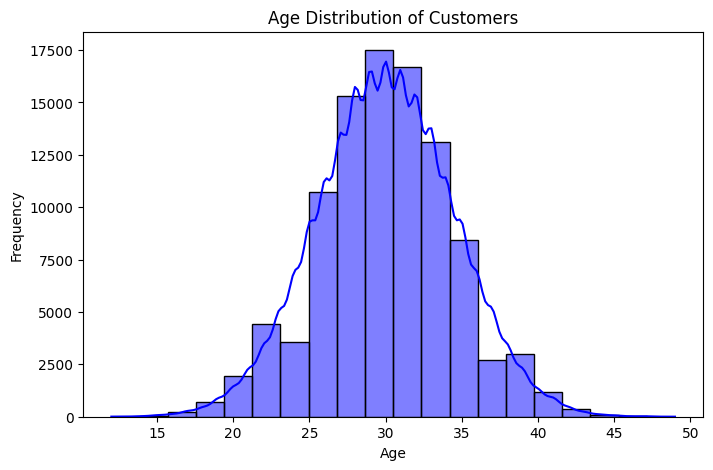

In [13]:
# ⿡ Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=20, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Customers")
plt.show()

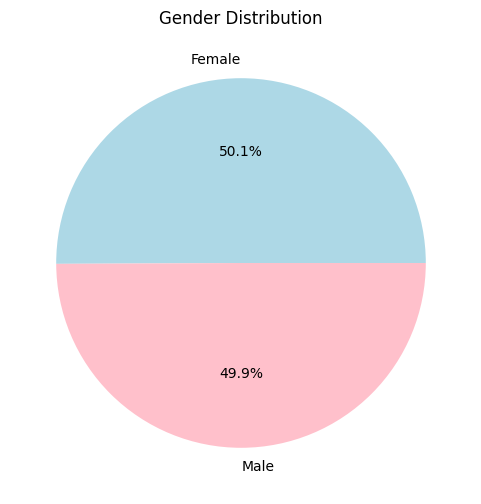

In [14]:

# ⿢ Gender Proportions
plt.figure(figsize=(6, 6))
df["gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.title("Gender Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

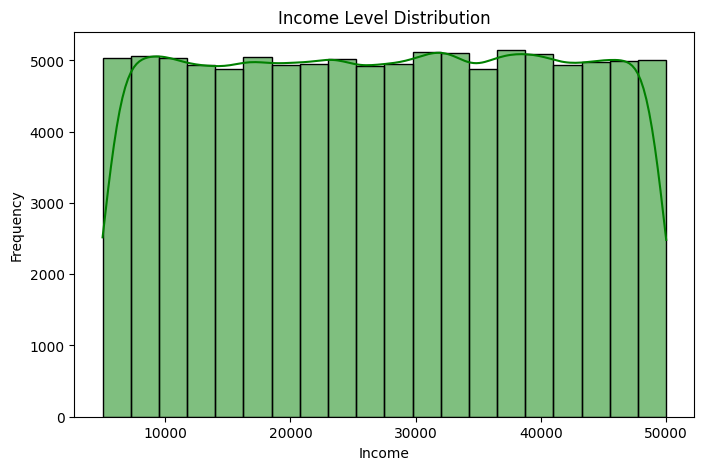

In [15]:
# ⿣ Income Level Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["income"], bins=20, kde=True, color="green")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Level Distribution")
plt.show()

C:\Users\damal\AppData\Local\Temp\ipykernel_20216\1096776624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="region", palette="viridis")


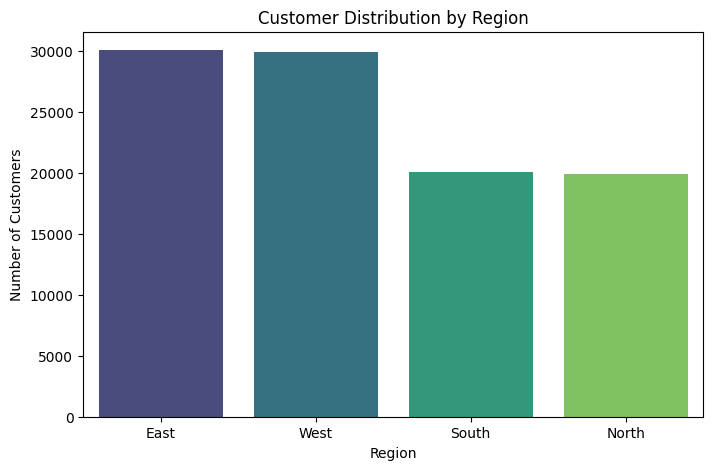

In [16]:
# ⿤ Geographic Segmentation
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="region", palette="viridis")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Region")
plt.show()

C:\Users\damal\AppData\Local\Temp\ipykernel_20216\889281519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="product_category", order=df["product_category"].value_counts().index, palette="coolwarm")


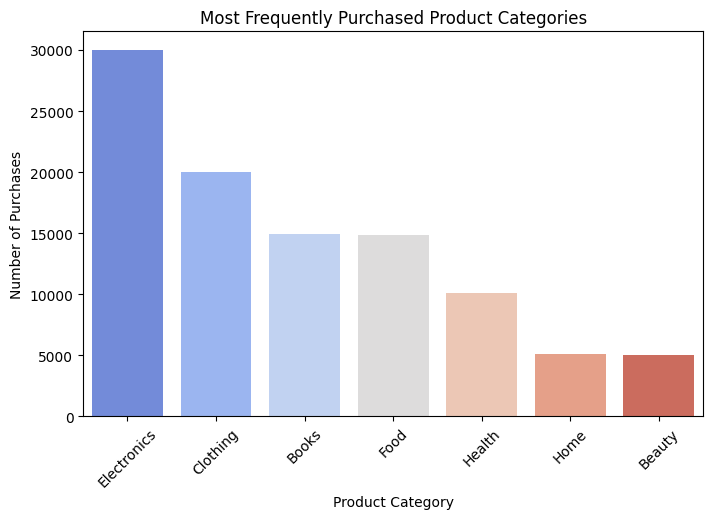

In [17]:
# ⿡ Most Frequently Purchased Product Categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="product_category", order=df["product_category"].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.title("Most Frequently Purchased Product Categories")
plt.show()

In [19]:
df["browsing_time"] = np.random.randint(5, 60, size=len(df))

In [20]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,Cluster,PCA1,PCA2,browsing_time
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,0,1.988753,-0.494090,51
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,3,-1.406214,1.149399,5
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,0,0.935373,1.037190,9
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,1,-1.675271,0.336036,34
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,2,2.543647,1.085279,32


C:\Users\damal\AppData\Local\Temp\ipykernel_20216\1650609204.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="month", palette="magma")


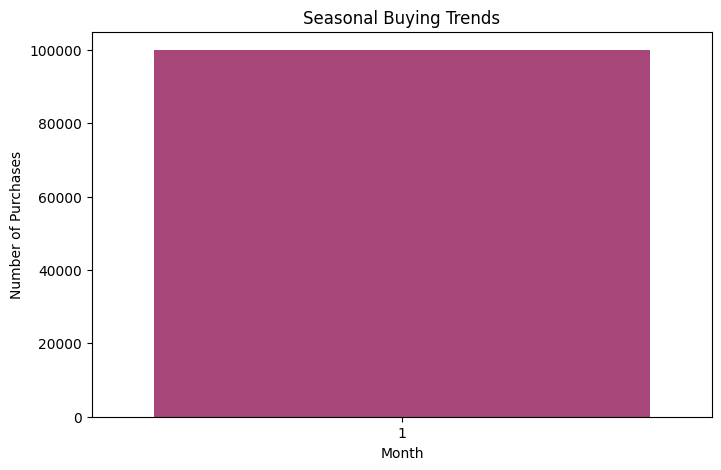

In [21]:
# ⿢ Seasonal Buying Trends (Assuming we have a 'purchase_date' column)
if "browsing_time" in df.columns:
    df["browsing_time"] = pd.to_datetime(df["browsing_time"])
    df["month"] = df["browsing_time"].dt.month

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="month", palette="magma")
    plt.xlabel("Month")
    plt.ylabel("Number of Purchases")
    plt.title("Seasonal Buying Trends")
    plt.show()
else:
    print("⚠ No 'purchase_date' column found. Skipping seasonal trend analysis.")

C:\Users\damal\AppData\Local\Temp\ipykernel_20216\1879757526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="purchase_frequency", order=["frequent", "occasional", "rare"], palette="crest")


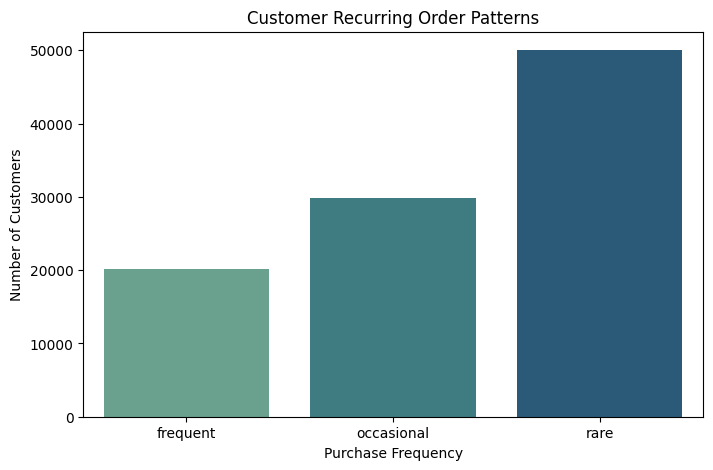

In [22]:
# ⿣ Recurring Orders by Customers
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="purchase_frequency", order=["frequent", "occasional", "rare"], palette="crest")
plt.xlabel("Purchase Frequency")
plt.ylabel("Number of Customers")
plt.title("Customer Recurring Order Patterns")
plt.show()

In [23]:
# Segmentation Insights
segment_summary = df.groupby("Cluster").mean(numeric_only=True)
print("Segment Characteristics:\n", segment_summary)

Segment Characteristics:
                age        income  purchase_amount  promotion_usage  \
Cluster                                                              
0        29.993095  38796.142601     13702.169469              0.0   
1        30.001983  16444.728885      5639.924574              0.0   
2        30.027572  38679.504573     13660.132357              1.0   
3        30.005269  16311.589181      5600.649413              1.0   

         satisfaction_score      PCA1      PCA2  month  
Cluster                                                 
0                  5.011152  1.212035 -0.405746    1.0  
1                  5.007732 -1.191878 -0.404740    1.0  
2                  5.028566  1.202656  0.950018    1.0  
3                  4.991662 -1.201881  0.933854    1.0  


In [25]:
# Save the clustered dataset
df.to_csv("customer_segments.csv", index=False)

print("Customer Segmentation Completed! Segmented data saved as 'customer_segments.csv'.")

Customer Segmentation Completed! Segmented data saved as 'customer_segments.csv'.
